In [1]:
# 1. Load the "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.) again.

import pandas as pd
import numpy as np
df = pd.read_csv('https://github.com/pvateekul/2110446_DSDE_2023s2/raw/main/DataSet/hed2020_dataset.csv')
df.shape

(5824, 24)

In [2]:
# 2. Choose edible mushrooms only.
# 3.  Only the variables below have been selected to describe the distinctive characteristics of edible mushrooms
# 'cap-color-rate','stalk-color-above-ring-rate'

terra = df[df.label=='e'][['label','cap-color-rate','stalk-color-above-ring-rate']]
terra

,label,cap-color-rate,stalk-color-above-ring-rate
1,e,2.0,1.0
2,e,3.0,1.0
4,e,4.0,1.0
5,e,2.0,1.0
6,e,3.0,1.0
...,...,...,...
5815,e,1.0,7.0
5819,e,1.0,7.0
5820,e,1.0,7.0
5821,e,1.0,7.0


In [3]:
# 4. Provide a proper data preprocessing as follows:
# Fill missing with mean
# Standardize variables with Standard Scaler

print(terra['cap-color-rate'].value_counts(dropna=False))
print(terra['stalk-color-above-ring-rate'].value_counts(dropna=False))

1.0     669
4.0     583
5.0     506
3.0     170
6.0      54
7.0      46
9.0      32
8.0      16
10.0     16
2.0       6
NaN       6
Name: cap-color-rate, dtype: int64
1.0    949
2.0    414
3.0    409
7.0    192
6.0     96
NaN     28
5.0     16
Name: stalk-color-above-ring-rate, dtype: int64


In [4]:
values={"cap-color-rate" : terra['cap-color-rate'].mean(), "stalk-color-above-ring-rate" : terra['stalk-color-above-ring-rate'].mean()}
terra.fillna(value=values,inplace=True)

In [5]:
print(terra['cap-color-rate'].value_counts(dropna=False))
print(terra['stalk-color-above-ring-rate'].value_counts(dropna=False))

1.000000     669
4.000000     583
5.000000     506
3.000000     170
6.000000      54
7.000000      46
9.000000      32
8.000000      16
10.000000     16
2.000000       6
3.467588       6
Name: cap-color-rate, dtype: int64
1.000000    949
2.000000    414
3.000000    409
7.000000    192
6.000000     96
2.410405     28
5.000000     16
Name: stalk-color-above-ring-rate, dtype: int64


In [6]:
# Standardize variables with Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
path=terra[['cap-color-rate','stalk-color-above-ring-rate']]
scaler.fit(path)
StandardScaler()
scaled = scaler.transform(path)

scaled_path = pd.DataFrame(scaled, index=path.index, columns=path.columns)
print(scaled_path)

      cap-color-rate  stalk-color-above-ring-rate
1          -0.735005                    -0.747608
2          -0.234180                    -0.747608
4           0.266645                    -0.747608
5          -0.735005                    -0.747608
6          -0.234180                    -0.747608
...              ...                          ...
5815       -1.235830                     2.432790
5819       -1.235830                     2.432790
5820       -1.235830                     2.432790
5821       -1.235830                     2.432790
5823       -1.235830                     2.432790

[2104 rows x 2 columns]


In [7]:
# 5. K-means clustering with 5 clusters and seed = 2020.

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=2020, n_init="auto").fit(scaled_path)
kmeans

KMeans(n_clusters=5, n_init='auto', random_state=2020)

In [14]:
# 6. Show the centroid of each cluster.
kmeans.cluster_centers_

array([[1.        , 6.76190476],
       [3.99671236, 1.19633424],
       [5.34982332, 2.30044527],
       [1.01351351, 1.85661095],
       [5.88222965, 6.        ]])

In [9]:
# 7. Convert the centroid value to the original scale

inversed = scaler.inverse_transform(scaled_path)
inversed = pd.DataFrame(inversed)

kmeans = KMeans(n_clusters=5, random_state=2020, n_init="auto").fit(inversed)

# kmeans.cluster_centers_
inversed.rename(columns={0: "cap", 1:"stalk"}, inplace=True)

In [10]:
terrapath = pd.concat([pd.DataFrame(kmeans.labels_),inversed], axis=1)
terrapath.rename(columns={0: "label"}, inplace=True)
terrapath

,label,cap,stalk
0,3,2.0,1.0
1,1,3.0,1.0
2,1,4.0,1.0
3,3,2.0,1.0
4,1,3.0,1.0
...,...,...,...
2099,0,1.0,7.0
2100,0,1.0,7.0
2101,0,1.0,7.0
2102,0,1.0,7.0


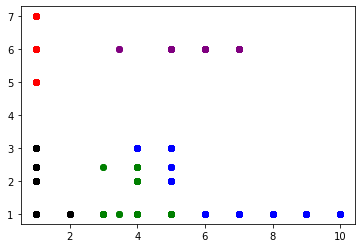

In [11]:
import matplotlib.pyplot as plt
label = kmeans.fit_predict(inversed)

ta0 = terrapath[label == 0]
ta1 = terrapath[label == 1]
ta2 = terrapath[label == 2]
ta3 = terrapath[label == 3]
ta4 = terrapath[label == 4]

# #Plotting the results
plt.scatter(ta0.iloc[:,1] , ta0.iloc[:,2] , color = 'red')
plt.scatter(ta1.iloc[:,1] , ta1.iloc[:,2] , color = 'green')
plt.scatter(ta2.iloc[:,1] , ta2.iloc[:,2] , color = 'blue')
plt.scatter(ta3.iloc[:,1] , ta3.iloc[:,2] , color = 'black')
plt.scatter(ta4.iloc[:,1] , ta4.iloc[:,2] , color = 'purple')
plt.show()